# Explore here

In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score



url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


El dataset contiene 1388 registros, 7 variables. 

Variables numericas:
-  *age*
-  *bmi*
-  *children*
-  *charges*

  Variables categoricas:
-  *sex*
-  *smoker*
-  *region*

Este tipo de varibles con sirven para realizar un analisis con mas acertividad, puede influir el que las personas mayores generen mayor gastos numericos, que personas con obesidad tienen mayor gasto medico, que tener mas hijos aumenten gastos del seguro. Por ende, tenemos que buscar si alguna de estas variables estan influencias spbre el costo del seguro, ya sea por el estado de salud, su habito de fumar o su edad. Para ello es importante realizar un EDA. 

In [213]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Podemos comprobar que no existen valores nulos, lo cual no debe perjudicar nuestra investigacion.

In [214]:
df_new = df.drop(columns=["region"])
df_new

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


Hemos eliminado la columna de region porque es ineccesaria, no nos arroja una infomacion importante para lograr un mejor analisis. 

In [215]:
df_new.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


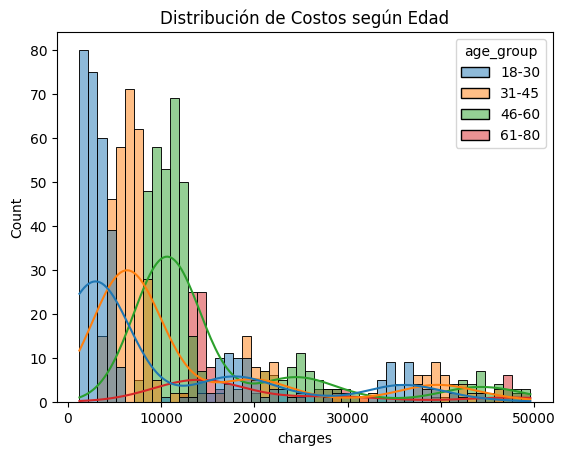

In [216]:
df_new["age_group"] = pd.cut(df_new["age"], bins=[18, 30, 45, 60, 80], labels=["18-30", "31-45", "46-60", "61-80"])
df_filtered= df_new[df_new["charges"] < 50000]
df_filtered[["age", "age_group"]].head()
sns.histplot(data=df_filtered, x="charges", hue="age_group", bins=50, kde=True)
plt.title("Distribución de Costos según Edad")
plt.show()

En este grafico nos podemos dar cuenta de que los costos tienden a aumentar con la edad, mayor variabilidad en los adultos mayores, y una distribucion sesgada. Factores como el tabaquismo y enfermedades crónicas pueden estar impactando los costos en adultos mayores. Esta claro que la variable *age* es relevante para para llevar a cabo nuestra investigacion. 

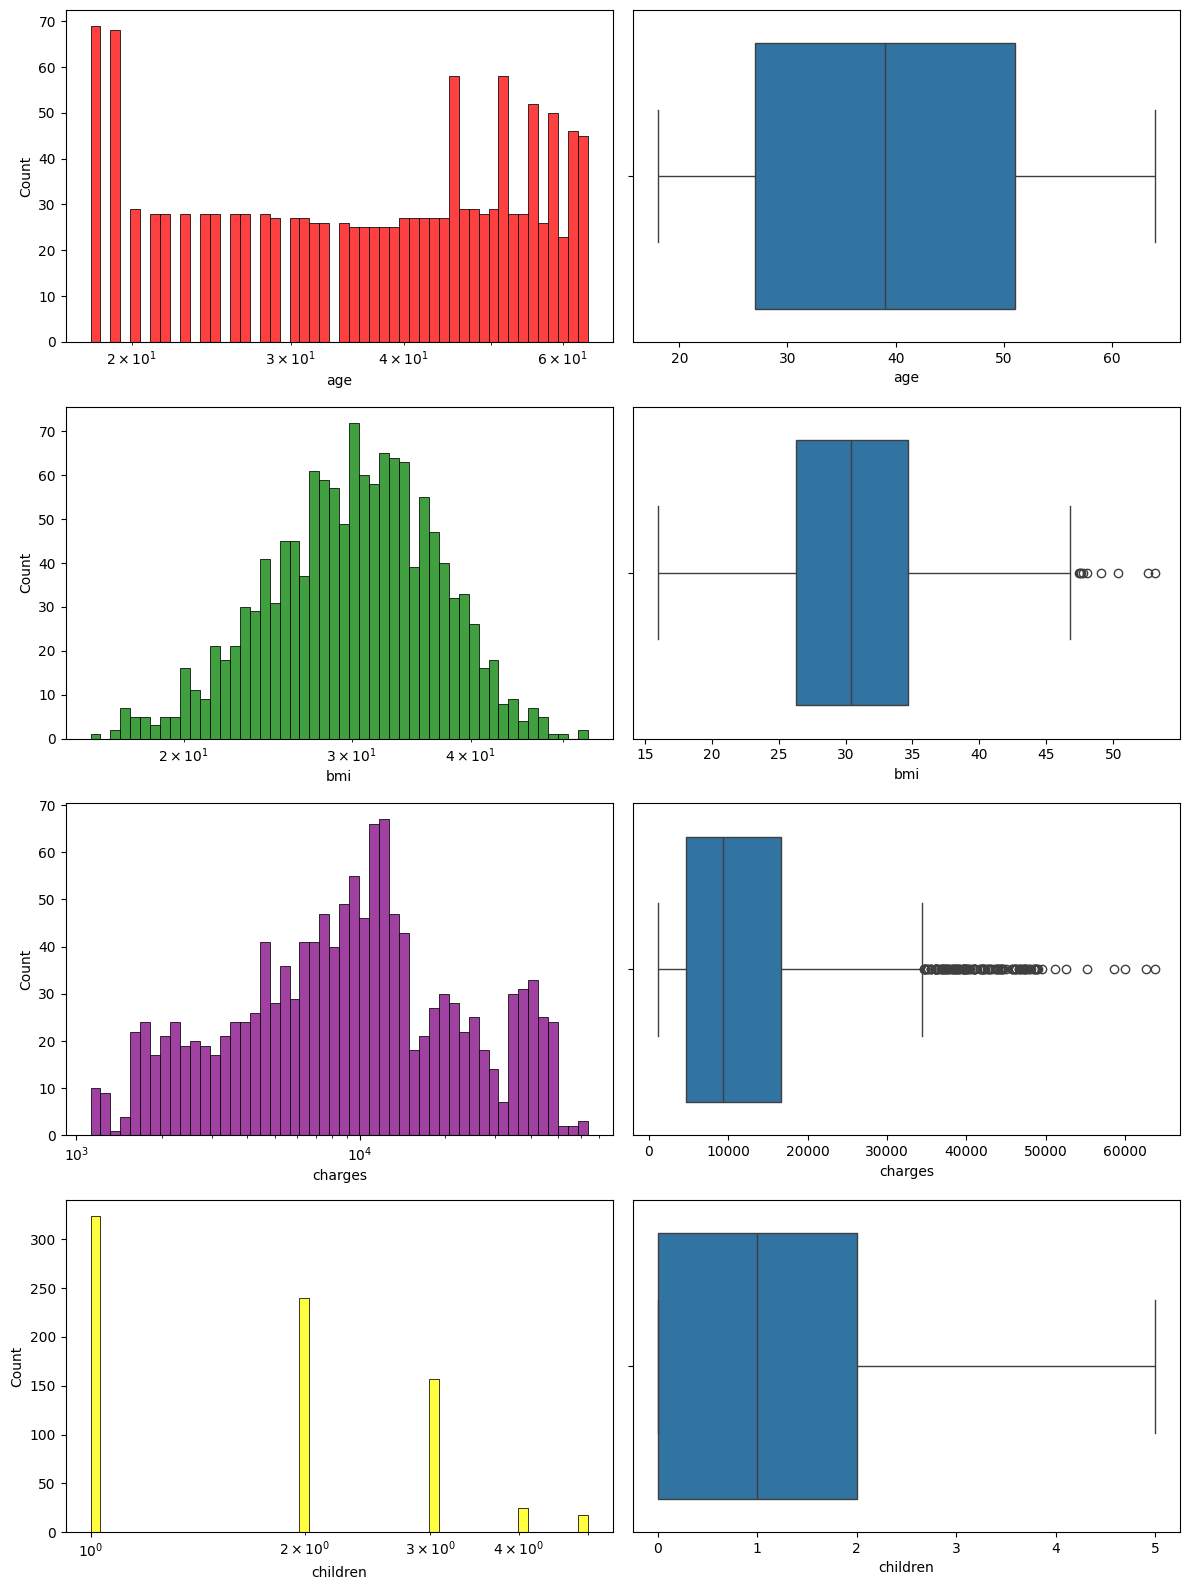

In [217]:
#ANALISIS DE LAS VARIABLES NUMERICAS

fig, axis = plt.subplots(4, 2, figsize=(12, 16))
variables = ["age", "bmi", "charges", "children"]
colors = ["red", "green", "purple", "yellow"]
for i, var in enumerate(variables):
    sns.histplot(ax=axis[i, 0], data=df_new, x=var, bins=50, color=colors[i], log_scale=True)
    sns.boxplot(ax=axis[i, 1], data=df_new, x=var)
# Ajustar diseño
plt.tight_layout()
plt.show()


La edad se distribuye uniformemente entre los 20 y 65 solo hay un pico elevado entre los 60 años, no se observan valores atipicos. En relacion al indice de masa corporal (*bmi*) la mayoria estan entre los 25 y 35 con un pico en 30, con valores atipicos por encima los 40, dando a entender que hay casos de obsidad extrema. Los costos estan entre 1.000$ y 20.000$, con valores atipicos por encima de los 30.000. La mayoria de las personas tiene 1 hijo o cero hijos, no se detallan valores atipicos. Se seguiere realizar un analisis a profundida en *bmi* y *charges*. 

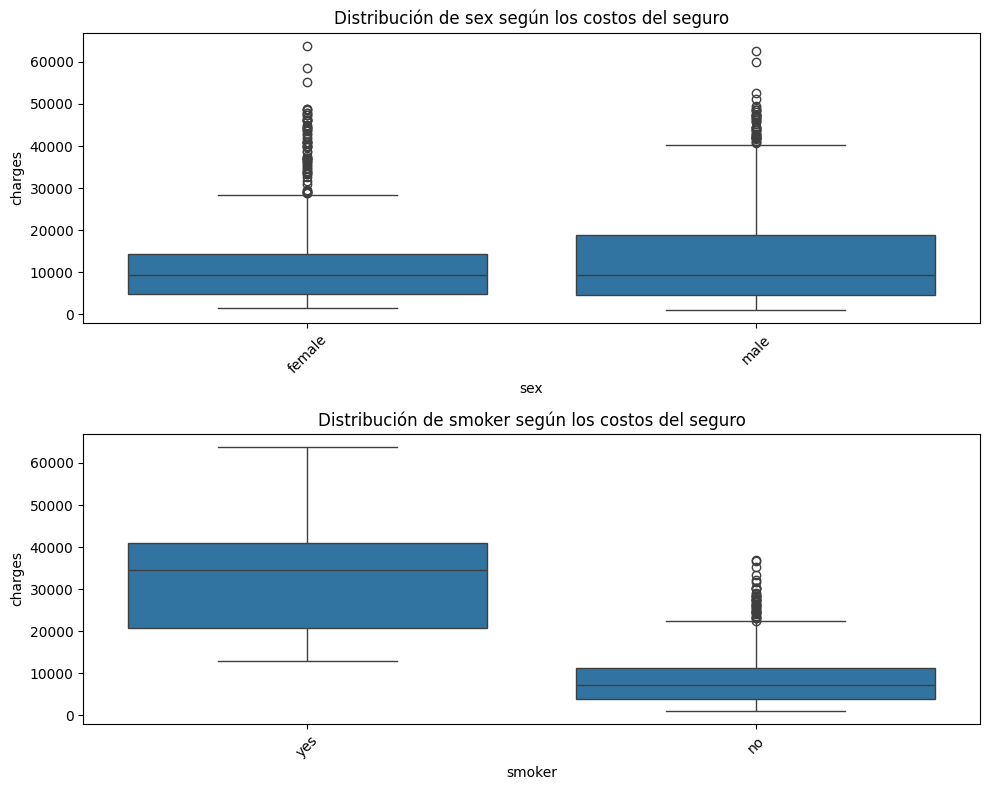

In [218]:
#Analisis de variables categoricas en funcion a la variable objetivo
categ_var = ["sex", "smoker"]
fig, axes = plt.subplots(len(categ_var), 1, figsize=(10, 8))

for i, var in enumerate(categ_var):
    sns.boxplot(data=df_new, x=var, y="charges", ax=axes[i])
    axes[i].set_title(f"Distribución de {var} según los costos del seguro")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


Por lo que podemos analizar es que no se ve gran diferencia en los costos medicos entre hombre y mujeres, pero podemos observar costos medicos elevados en algunos casos. Es evidente que los fumadores tienen costos mas altos, incluso hay valores atipicos que nos indican que algunos de ellos tienen costos super elevados. En conclusion fumar afecta los costos medicos. 

In [219]:
df_new.isnull().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
charges       0
age_group    69
dtype: int64

In [220]:
df_new = df_new.drop(columns=["age_group"], errors="ignore")
df_new

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


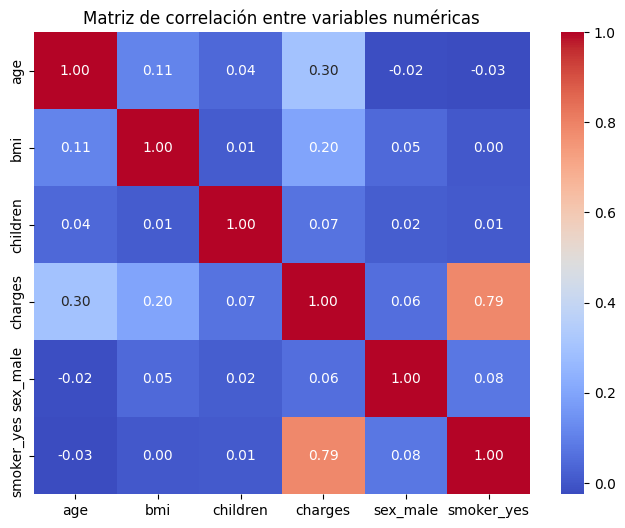

In [221]:
#Matriz de correlacion
df_new = pd.get_dummies(df_new, drop_first=True)
corr_matrix = df_new.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

La correlacion entre *charges* y *smoker_yes* es muy alta lo que quiere decir que fumar incrementa los costos, y en relacion con la edad *age* las personas mayores tienden a pagar mas, tambien el indice de masa corporal. 
El numeros de hijos no influye en los costos, y el genero tampoc tiene impacto significativo een estos. Se sugiere realizar un modelo de regresion con las variables *smoker_yes*, *age*, *bmi*. 

In [222]:
#Evaluar valores atipicos 
bmi_stats = df_new["bmi"].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [223]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper = bmi_stats["75%"] + 1.5 * bmi_iqr
lower = bmi_stats["25%"] -1.5 * bmi_iqr
print(f"The upper and lower limits for finding outliers are {round(upper, 2)} and {round(lower, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.29 and 13.7, with an interquartile range of 8.4


Los valores por debajo de 13.7 podrian representar individuos de peso muy bajo o errores en la data. Los valores por encima de 47.29 indican valores de obesidad extrema. 

In [224]:
#Evaluar valores atipicos en charges 
charges_stats = df_new["charges"].describe()
charges_stats

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [225]:
charges_iqr = charges_stats["75%"] - charges_stats["25%"]
upper = charges_stats["75%"] + 1.5 * charges_iqr
lower = max(0, charges_stats["25%"] -1.5 * charges_iqr)
print(f"The upper and lower limits for finding outliers are {round(upper, 2)} and {round(lower, 2)}, with an interquartile range of {round(charges_iqr, 2)}")

The upper and lower limits for finding outliers are 34489.35 and 0, with an interquartile range of 11899.63


Los valores por encima de los 34,489.35 representan costos extreamadamente altos, podria tratarse de enfermedades caras o tratamientos costosos. Por otro lado, aquellos valores cercanos a 0 indican gastos minimos puden ser seguros que cubren todo o sin grandes necesidades de atencion medica. 

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [227]:
#Eliminar los outliers basada en percentiles
# Percentiles extremos

low = 0.01  #más bajo
high = 0.99  #más alto

# Filtramos valores
df_filtered = df_new[
    (df_new['bmi'] > df_new['bmi'].quantile(low)) & 
    (df_new['bmi'] < df_new['bmi'].quantile(high)) &
    (df_new['charges'] > df_new['charges'].quantile(low)) & 
    (df_new['charges'] < df_new['charges'].quantile(high))
]

print(df_filtered.shape)


(1284, 6)


In [228]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1284 non-null   int64  
 1   bmi         1284 non-null   float64
 2   children    1284 non-null   int64  
 3   charges     1284 non-null   float64
 4   sex_male    1284 non-null   bool   
 5   smoker_yes  1284 non-null   bool   
dtypes: bool(2), float64(2), int64(2)
memory usage: 52.7 KB


Ahora, luego de nuestra eliminacion de variables con datos redundantes y outliers que iban a afectar nuestro analisis, el dataset tomo lo siguiente forma:
Contiene 1.284 registros y 6 columnas.
-  Variables:
  *age*, *bmi*, *children*, *charges*, *sex_male*, *smoker_yes*. 

El data set no contiene valores nulos.
Filtrado de valores extremos en *bmi* y *charges*, con la eliminacion de outliers. 
Las variables *sex_male* y *smoker_yes* en valores booleanos facilitando asi la entrada para los modelos de Machine Learning.

In [229]:
shape_old = 1388
shape_new = df_filtered.shape[0]

print(f"Tamaño antiguo: {shape_old}, actual: {shape_new}, se ha eliminado un {100*(1-shape_new/shape_old):.2f}% de los datos lo cual es admisible")

Tamaño antiguo: 1388, actual: 1284, se ha eliminado un 7.49% de los datos lo cual es admisible


In [ ]:
# Preparacon de datos
# X: variables predictoras
# Y: variable objetivo

X = pd.get_dummies(df_filtered.drop(columns=["charges"]), drop_first=True)
y = df_filtered["charges"]

#Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamaño de train: {X_train.shape}, Tamaño de test: {X_test.shape}")

Tamaño de train: (898, 5), Tamaño de test: (386, 5)


In [ ]:
# Inicializar el escalador
scaler = StandardScaler()

# Aplicar transformación a los datos de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Inicializar y entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predicción en el conjunto de prueba
y_pred = lr_model.predict(X_test_scaled)

# Evaluar el rendimiento
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Error Absoluto Medio (MAE): 4128.66
Coeficiente de Determinación (R²): 0.72


El modelo tiene un 72% (r2) de variavilidad en costos medicos, es un buen resultado pero podria tener margen de mejora, por otro lado, el MAE nos muestra que el modelo se equivoca en $4128,66 al predecir *charges*, aunque captura gran parte de la variabilidad hay factores que no estan siendo modelados correctamente, para ello probaremos otros modelos. 

El modelo anterior es bueno, pero hay margen para mejorar la precision.

In [ ]:
# Modelo Ridge
# transformación logarítmica a charges
df_fil = df_filtered.copy()
df_fil["log_charges"] = np.log(df_fil["charges"])

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Escalar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#modelo con regresión Ridge
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, y_train_log)
y_pred_ridge = model_ridge.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", round(mean_absolute_error(y_test_log, y_pred_ridge), 2))
print("MSE:", round(mean_squared_error(y_test_log, y_pred_ridge), 2))
print("R²:", round(r2_score(y_test_log, y_pred_ridge), 4))


MAE: 0.27
MSE: 0.18
R²: 0.7448


Las metricas muestran una mejora despues de aplicar regresion Ridge con transformacion logaritmica en *charges*. 
-  MAE, el error de prediccion es muy bajo lo cual ajusta bien los datos tranformados. 
-  MSE, tambien es reducido lo cual nos confirma que los errores son minimos y, 
-  R2, mejoro en relacion al anterior, es decir que ahora el modelo explica 74.48% de la variabilidad en *charges*